In [1]:
import csv
import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import randint

# Read the csv
lines = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
print("The csv file has been loaded.")

images = []
measurements = []
correction = 0.2

for line in lines:
    for i in range(3):
        source_path = line[i]
        filename = source_path.split('IMG')[-1]
        current_path = './data/IMG' + filename
        image = cv2.imread(current_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image[50:140,:,:] # 90*320*3
        image = cv2.resize(image, (160,45))# 45*160*3
        images.append(image)
        measurement = float(line[3])
        if i==1:
            measurement+= correction
        elif i==2:
            measurement-= correction
        measurements.append(measurement)
        
print(len(images))
print(len(measurements))
print(images[0].shape)
plt.imshow(images[0])

The csv file has been loaded.
18843
18843
(45, 160, 3)


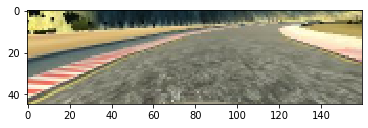

In [6]:
import random
augmented_images, augmented_measurements =[], []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement* -1.0)
    
plt.imshow(augmented_images[1])
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)
#X_train, y_train = shuffle(X_train, y_train)
#print("The train data has been shuffled")

Using TensorFlow backend.
W0905 02:56:36.572156   488 deprecation_wrapper.py:119] From C:\Users\Hiroyuki\Anaconda3\envs\tensorflow-cpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 02:56:36.711066   488 deprecation_wrapper.py:119] From C:\Users\Hiroyuki\Anaconda3\envs\tensorflow-cpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

C:\Users\Hiroyuki\Anaconda3\envs\tensorflow-cpu\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", strides=(2, 2))`
  
W0905 02:56:36.772028   488 deprecation_wrapper.py:119] From C:\Users\Hiroyuki\Anaconda3\envs\tensorflow-cpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 45, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 78, 64)        4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 37, 36)         57636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 17, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 15, 64)         27712     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 15, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 960)               0         
__________

W0905 02:56:37.771384   488 deprecation_wrapper.py:119] From C:\Users\Hiroyuki\Anaconda3\envs\tensorflow-cpu\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 30148 samples, validate on 7538 samples
Epoch 1/3
30148/30148 [==============================] - 1371s 45ms/step - loss: 0.0137 - val_loss: 0.0098
Epoch 2/3
30148/30148 [==============================] - 1328s 44ms/step - loss: 0.0044 - val_loss: 0.0079
Epoch 3/3
30148/30148 [==============================] - 1316s 44ms/step - loss: 0.0037 - val_loss: 0.0078
dict_keys(['val_loss', 'loss'])


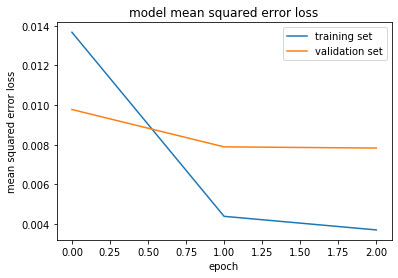

model has be saved


In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Conv2D, MaxPooling2D, Dropout

model = Sequential()
model.add(Lambda(lambda x:x/127.5-1.0, input_shape =(45,160,3)))
model.add(Conv2D(64, 5, 5, activation='relu', subsample=(2, 2)))
model.add(Conv2D(36, 5, 5, activation='relu', subsample=(2, 2)))
model.add(Conv2D(48, 5, 5, activation='relu', subsample=(2, 2)))
model.add(Conv2D(64, 3, 3, activation='relu'))
#model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.summary()

model.compile(loss='mse', optimizer='adam')
history_object = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=3, verbose=1)
#model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=3)
#----------------------------------------------------------------------------
### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()
#----------------------------------------------------------------------------
model.save('model.h5')
print('model has be saved')

In [6]:
%run -i drive.py model.h5

NOT RECORDING THIS RUN ...


(19132) wsgi starting up on http://0.0.0.0:4567
(19132) accepted ('127.0.0.1', 62444)


connect  4f5f86d456944c12a6a09abe71adb877
0.0034257329534739256 0.918
0.0034257329534739256 0.936
0.0034818656276911497 0.9540000000000001
0.0033177852164953947 0.972
0.0033177852164953947 0.9259134000000001
0.0033177852164953947 0.9426568000000001
0.004762251861393452 0.8662130000000001
0.012260840274393559 0.794062
0.012260840274393559 0.8072710000000001
0.000178114278241992 0.7608916000000001
0.003358040703460574 0.6717686
0.007166282273828983 0.5923002000000002
0.007166282273828983 0.6006018000000001
0.01072100643068552 0.45604619999999996
0.006918695755302906 0.4339024
0.006918695755302906 0.4386686
-0.007272384129464626 0.3328158000000001
-0.0010688744951039553 0.316798
-0.0010688744951039553 0.31903020000000004
0.015292529948055744 0.30084200000000005
-0.0063260337337851524 0.25762039999999997
-0.0063260337337851524 0.2585688
-0.0063260337337851524 0.25951719999999995
-0.010424084030091763 0.19606280000000004
0.01996687427163124 0.18674179999999999
0.01996687427163124 0.1862508


-0.007356896065175533 0.08228759999999995
-0.007356896065175533 0.08253899999999995
0.0064057642593979836 0.08224979999999996
-0.008651337586343288 0.08198059999999988
-0.02105388231575489 0.08180339999999992
-0.02105388231575489 0.08202619999999991
0.026157226413488388 0.08187159999999989
-0.015234279446303844 0.08158719999999998
-0.015234279446303844 0.08179279999999998
0.00830348115414381 0.08158019999999988
-0.019863713532686234 0.08131860000000005
-0.019863713532686234 0.08150700000000002
-0.1881929636001587 0.08124659999999999
-0.010224237106740475 0.08112019999999998
-0.01498219184577465 0.0824464
-0.01498219184577465 0.08264260000000001
-0.009885708801448345 0.08254299999999996
0.0014211691450327635 0.0821826
0.0014211691450327635 0.08236219999999998
0.035565100610256195 0.08212359999999988
0.023725641891360283 0.08176460000000003
0.023725641891360283 0.08192560000000003
0.034419022500514984 0.08166839999999992
0.006047242321074009 0.0814744
-0.028734255582094193 0.081181799999

0.02461239881813526 0.07821399999999996
0.02461239881813526 0.07821099999999996
-0.0033560425508767366 0.0784731999999999
0.014567664824426174 0.07845499999999994
0.007680772803723812 0.07842620000000002
0.007680772803723812 0.07842740000000001
-0.0038519122172147036 0.07837759999999996
0.016348879784345627 0.07831659999999992
0.04298257455229759 0.07828499999999998
0.04298257455229759 0.07828339999999999
0.014537272043526173 0.07825120000000006
0.026518967002630234 0.07827959999999999
0.026518967002630234 0.078278
0.0337919220328331 0.0782355999999999
0.06142695993185043 0.07821279999999994
0.06142695993185043 0.07820999999999993
0.026036271825432777 0.0781868
0.06849458813667297 0.07824480000000003
0.06849458813667297 0.07824280000000004
-0.01131169032305479 0.07821019999999994
0.021863646805286407 0.07828919999999992
0.021863646805286407 0.0782881999999999
0.06243397295475006 0.07836879999999989
0.07952579110860825 0.07834899999999996
0.07952579110860825 0.07834919999999997
0.045299

-0.06261090934276581 0.07514759999999994
-0.054403163492679596 0.07508919999999993
-0.054403163492679596 0.07502079999999993
-0.05638426914811134 0.0749625999999999
-0.053586915135383606 0.07490459999999988
-0.053586915135383606 0.07483659999999988
-0.0716320276260376 0.07482979999999992
-0.080195352435112 0.07483439999999994
-0.080195352435112 0.07476899999999993
-0.07363907992839813 0.07476479999999998
-0.07729612290859222 0.07474139999999989
-0.06765998154878616 0.07467799999999988
-0.06765998154878616 0.07461459999999988
-0.07262997329235077 0.07455119999999987
-0.07239364087581635 0.07447759999999991
-0.07239364087581635 0.0744139999999999
-0.10043652355670929 0.07432999999999994
-0.08896368741989136 0.07426599999999994
-0.09947160631418228 0.07428359999999995
-0.09947160631418228 0.07422119999999995
-0.07920395582914352 0.07416899999999993
-0.06905047595500946 0.07410679999999992
-0.06905047595500946 0.07404459999999992
-0.08474860340356827 0.0739416
-0.05740571394562721 0.073847

-0.050618976354599 0.07750659999999981
-0.008130169473588467 0.07755899999999992
0.00621830765157938 0.0776323999999998
0.00621830765157938 0.07765579999999979
0.0070196399465203285 0.07776079999999978
0.0282028466463089 0.0778571999999998
0.0282028466463089 0.07788359999999979
0.01695551723241806 0.07803239999999986
0.030723482370376587 0.07827539999999991
0.030723482370376587 0.07830839999999992
0.02923642098903656 0.0784229999999999
0.05146590620279312 0.07855959999999984
0.05146590620279312 0.07859619999999982
0.041243284940719604 0.07870419999999984
0.04719340056180954 0.07886459999999992
0.04719340056180954 0.07890499999999993
0.05166231095790863 0.07900659999999979
0.04461219161748886 0.07909919999999984
0.04461219161748886 0.07914179999999983
0.04787299036979675 0.0792761999999998
0.05272483825683594 0.07936139999999989
0.05272483825683594 0.07940659999999988
0.05582324415445328 0.07953339999999987
0.04993380606174469 0.07915179999999977
0.04993380606174469 0.07919019999999977


0.05316496640443802 -1.7756984000000005
0.008181014098227024 -1.6693728000000005
0.09218990057706833 -1.5558998000000004
0.09218990057706833 -1.5802968000000004
0.04367456212639809 -1.381069
0.01893061026930809 -1.3003970000000002
0.01893061026930809 -1.3184350000000002
0.001394212944433093 -1.2002112000000003
0.009446715004742146 -1.0840688000000003
0.05007324367761612 -1.0326882000000002
0.05007324367761612 -1.0442176
0.057295333594083786 -0.9288896000000004
0.05103876441717148 -0.8116964000000004
0.05757587403059006 -0.7553496000000004
0.05757587403059006 -0.7606828000000003
0.0449679009616375 -0.6426164000000002
0.04272697493433952 -0.5198762000000002
0.056184254586696625 -0.4587588000000002
0.056184254586696625 -0.45800140000000017
0.06880524009466171 -0.33629240000000016
0.06247501075267792 -0.21397640000000018
0.052249688655138016 -0.14933000000000007
0.052249688655138016 -0.1427036000000001
0.0545838288962841 -0.026559800000000133
0.03128063678741455 -0.009401600000000176
0.054

-0.1092996895313263 0.07814999999999991
-0.1092996895313263 0.07826339999999991
-0.08268074691295624 0.07832580000000003
-0.10963426530361176 0.07837699999999999
-0.10963426530361176 0.07848819999999998
-0.09316686540842056 0.07846679999999993
-0.10758522152900696 0.07852440000000006
-0.10758522152900696 0.07863200000000006
-0.08349309116601944 0.0785661999999999
-0.09957483410835266 0.07860920000000006
-0.10056370496749878 0.07858979999999999
-0.10056370496749878 0.0786904
-0.12494377046823502 0.07863799999999997
-0.10606798529624939 0.07864380000000001
-0.10606798529624939 0.0787396
-0.07044846564531326 0.07884559999999997
-0.11364248394966125 0.07886
-0.11364248394966125 0.07895440000000001
-0.09858480095863342 0.07894680000000007
-0.12908825278282166 0.0790698
-0.12908825278282166 0.0791628
-0.06076519936323166 0.07915380000000007
-0.0661560595035553 0.07926520000000001
-0.0661560595035553 0.0793566
-0.07029212266206741 0.07927460000000003
-0.06645261496305466 0.07926059999999992
-

0.010188587941229343 0.07235899999999995
0.008551624603569508 0.07197220000000006
0.00786143634468317 0.07137860000000011
0.00786143634468317 0.07012500000000009
0.014201630838215351 0.06983020000000004
0.015832670032978058 0.06971739999999996
0.015832670032978058 0.06850459999999994
0.008717556484043598 0.06844439999999999
0.009355501271784306 0.06852920000000008
0.009355501271784306 0.06736400000000008
0.00781403947621584 0.06746360000000004
-0.008802997879683971 0.06768999999999993
-0.008802997879683971 0.06657639999999992
-0.01574975624680519 0.06680920000000005
-0.017389006912708282 0.06672160000000008
-0.010736691765487194 0.0670514000000001
-0.010736691765487194 0.06601120000000008
-0.018118001520633698 0.06671520000000002
-0.034121692180633545 0.066719
-0.03633590787649155 0.06716079999999995
-0.0359686017036438 0.06725320000000003
-0.0359686017036438 0.06631560000000003
-0.03717557713389397 0.06670400000000001
-0.03905091434717178 0.06676139999999993
-0.040583327412605286 0.06

(19132) accepted ('127.0.0.1', 62450)


connect  f0c086c3cd914527b79b65819febb8d3
-0.0069108447059988976 1.009107
-0.0069108447059988976 1.027107
-0.0069108447059988976 1.000431
-0.005451004020869732 0.838851
-0.020920198410749435 0.7631190000000001
-0.020920198410749435 0.7749870000000001
-0.017390448600053787 0.6081510000000001
0.00939538050442934 0.4824870000000001
0.023873858153820038 0.78438
0.023873858153820038 0.7959229999999999
0.022882070392370224 1.0556422
0.021760743111371994 0.9599942
0.016188744455575943 1.0173624000000001
0.016188744455575943 1.0324206
0.0120301628485322 1.0503552
0.002046790672466159 1.0305756000000001
0.00465186033397913 1.0138246
0.00987399835139513 0.9917702000000002
0.00987399835139513 1.0048858
0.006542258895933628 0.9657978
-0.006709414534270763 0.937355
-0.006709414534270763 0.8721012000000001
-0.006709414534270763 0.8818974000000002
-5.904887802898884e-05 0.8423868000000001
0.02307051047682762 0.7630780000000001
0.010440678335726261 0.6984732
0.010440678335726261 0.7041684
0.0130191603

0.066412054002285 0.14080999999999994
0.066412054002285 0.1458011999999999
0.0843447595834732 0.14427459999999998
0.06405669450759888 0.1408861999999999
0.06596557796001434 0.13925359999999998
0.06596557796001434 0.143831
0.06580691784620285 0.14024839999999997
0.08126877248287201 0.13633239999999994
0.08126877248287201 0.14058639999999994
0.005992927588522434 0.13689459999999998
0.01401891652494669 0.13314899999999996
0.01401891652494669 0.13709339999999995
0.041643161326646805 0.13361219999999996
0.03946259617805481 0.12998539999999997
0.03946259617805481 0.13363859999999997
0.024873383343219757 0.13204899999999994
0.0281342975795269 0.12863279999999994
0.0281342975795269 0.13204659999999996
0.05172710120677948 0.12868759999999996
0.011154641397297382 0.12716439999999996
0.0006592392455786467 0.12407819999999999
0.0006592392455786467 0.12714199999999998
0.02011951431632042 0.12407559999999995
0.0438489206135273 0.12095019999999997
0.0438489206135273 0.12377479999999996
0.031301345676

-0.03089055046439171 0.07820719999999999
0.030057024210691452 0.07817439999999987
-0.025790035724639893 0.07811039999999983
-0.025790035724639893 0.07810639999999983
-0.008153862319886684 0.07820439999999994
-0.17522548139095306 0.0782227999999999
-0.17522548139095306 0.0782211999999999
0.006109823472797871 0.07816859999999985
-0.005880708806216717 0.07956339999999984
-0.005880708806216717 0.07958819999999985
-0.0029204741585999727 0.07994959999999997
-0.029239892959594727 0.07985859999999989
-0.029239892959594727

127.0.0.1 - - [04/Sep/2019 22:54:54] "GET /socket.io/?EIO=4&transport=websocket HTTP/1.1" 200 0 211.166079


 0.07988759999999988
-0.00723948422819376 0.07962079999999987
0.027735570445656776 0.07949099999999985
0.027735570445656776 0.07951119999999985
-0.008005942218005657 0.0792763999999999
0.024990156292915344 0.0792099999999999
0.024990156292915344 0.0792235999999999
-0.0020937800873070955 0.07902299999999986
-0.0020937800873070955 0.07903239999999985
0.0077929506078362465 0.07888879999999984
-0.006027591414749622 0.07880339999999987
-0.006027591414749622 0.07880799999999986
-0.009477856568992138 0.07865959999999987
0.04132980480790138 0.07857959999999987
0.04132980480790138 0.07857959999999987
0.0029092745389789343 0.0784877999999999
0.0352831706404686 0.07850639999999985
0.0352831706404686 0.07850499999999985
0.0059369998052716255 0.07843219999999984
-0.04467471316456795 0.07839879999999991
-0.04467471316456795 0.0783953999999999
-0.005821682512760162 0.07834099999999984
0.008404870517551899 0.07840799999999985
0.008404870517551899 0.07840499999999985
0.006619841791689396 0.078350999999

-0.011802195571362972 0.07895280000000009
0.04853367432951927 0.07889240000000006
0.04853367432951927 0.07889200000000006
0.05144914612174034 0.07879980000000009
0.021900638937950134 0.0789098
0.021900638937950134 0.0789098
0.07811971008777618 0.0789098
0.16177235543727875 0.07883839999999999
0.16177235543727875 0.07883699999999999
0.009865683503448963 0.07894780000000008
0.014488779939711094 0.07968300000000002
0.014488779939711094 0.07969820000000001
0.057703856378793716 0.07987659999999999
0.048174209892749786 0.07980320000000002
0.048174209892749786 0.07981980000000001
0.15698762238025665 0.07973440000000007
0.15867289900779724 0.07960620000000004
0.17403806746006012 0.08021979999999992
0.17403806746006012 0.08024339999999992
0.11803045868873596 0.08044040000000005
0.04836191236972809 0.08048780000000001
0.04836191236972809 0.08051520000000001
0.047745902091264725 0.08023659999999999
0.09448828548192978 0.08001320000000002
0.09448828548192978 0.08002980000000003
0.17224229872226715

wsgi exiting
127.0.0.1 - - [04/Sep/2019 22:56:15] "GET /socket.io/?EIO=4&transport=websocket HTTP/1.1" 200 0 134.667936
(19132) wsgi exited, is_accepting=True


In [5]:
import subprocess
subprocess.run(['jupyter', 'nbconvert', '--to', 'python', 'test_190901-Copy3.ipynb'])

CompletedProcess(args=['jupyter', 'nbconvert', '--to', 'python', 'test_190901-Copy3.ipynb'], returncode=0)